<a href="https://colab.research.google.com/github/hbisgin/DeepLearning/blob/main/DL_4_Q.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Let's dive a little bit in PyTorch

In [ ]:
import torch


# 1. Define the function
def f(x):
    return (x - 2)**2

# 2. Define the derivative manually
def df(x):
    return 2 * (x - 2)

# 3. Create values (torch.linspace instead of np.linspace)
x = torch.linspace(-2, 6, 100)

y = f(x)
y_prime = df(x)

In [ ]:
print(y)

#As you have noticed, I am still creating a function for the derivation. Let's see what else PyTorch can do for us

In [ ]:
import torch

# linspace again, but note that with gradient tracking enabled
x = torch.linspace(-10, 10, 100, requires_grad=True)

# Let's remember our function again
def f(x):
    return (x - 2)**2

value = f(x)
print(value)
# Now, calculate the derivative automatically
# Since 'y' is a vector of 100 points, we tell PyTorch
# to calculate the derivative for each point individually.
value.backward(torch.ones_like(x))

# If you want to access the calculated derivative
y_prime_auto = x.grad
y_prime_auto

#How can we find where the function, f, is the minimum? In other words, where is the best x?

In [ ]:
import torch

# Initialize x at a "wrong" or random value (e.g., 5)
# requires_grad=True tells PyTorch to track the math for this variable. Don't get lost here. We will talk about this stuff again in the following lectures

def f(x):
  return (x-2)**2;

x = torch.tensor([5.0], requires_grad=True) # this is the rrandom initialization I did before


learning_rate = 0.1
iterations = 20

print(f"Starting at x = {x.item():.4f}")

for i in range(iterations):
    y = f(x)
    # Calculate the derivative (The Backward Pass)
    # This automatically finds that f'(x) = 2(x-2)
    y.backward()

    # Update x (The Gradient Descent Step)
    # We move x in the OPPOSITE direction of the slope
    with torch.no_grad():
        x -= learning_rate * x.grad

    # Clear the gradient for the next round
    x.grad.zero_()

    if i % 2 == 0:
        print(f"Iteration {i}: x = {x.item():.4f}, Slope = {2*(x.item()-2):.4f}")

print(f"\nFinal optimized x: {x.item():.4f}")

#Let's visualize our progress for x

In [ ]:
import torch
import matplotlib.pyplot as plt

def f(x):
  return (x-2)**2

x = torch.tensor([5.0], requires_grad=True)
learning_rate = 0.1
history_x = []
history_y = []

for i in range(25):
    y = f(x)

    # Store history for plotting
    history_x.append(x.item())
    history_y.append(y.item())

    y.backward()
    with torch.no_grad():
        x -= learning_rate * x.grad
    x.grad.zero_()

# Plotting the results
plt.plot(history_x, 'o-', color='blue')
plt.axhline(y=2, color='red', linestyle='--')
plt.title("Path of x toward the minimum (2.0)")
plt.xlabel("Iteration")
plt.ylabel("Value of x")
plt.show()

#If you need to automate, below is the way. However, we will delve into this later. I'm just leaving this example here for an early exposure

In [1]:
import torch

x = torch.tensor([5.0], requires_grad=True)
def f(x):
  return (x - 2)**2


# SGD stands for Stochastic Gradient Descent
optimizer = torch.optim.SGD([x], lr=0.1)

for i in range(20):
    optimizer.zero_grad()   # Reset slopes to zero
    y = f(x)        # Calculate function
    y.backward()            # Calculate new slopes
    optimizer.step()        # Move x based on the slope

print(f"Optimized x: {x.item():.4f}")

Optimized x: 2.0346


#Please implement the minimization procedure shown in the slides and explain what the loop is doing in your comments.

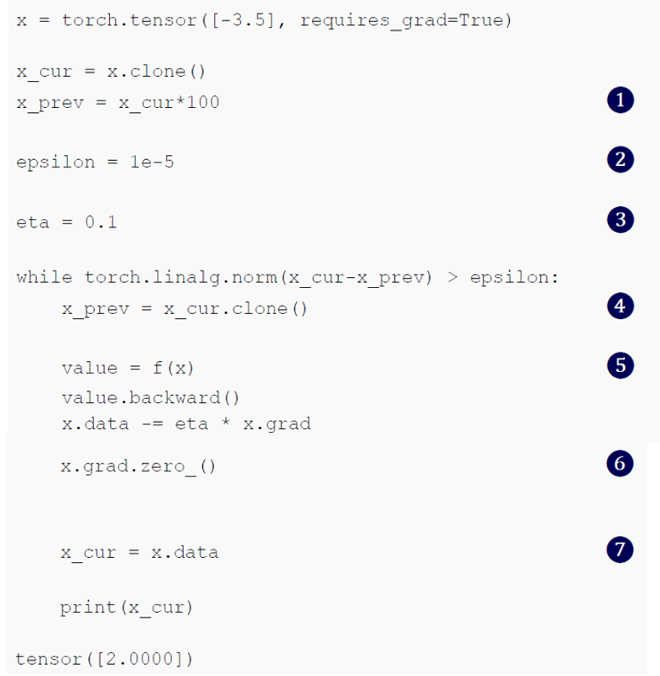

In [3]:
# This uses gradient descent to find the best value of x

x = torch.tensor([-3.5], requires_grad=True) # Make the tensor
x_cur = x.clone() # X starting val
x_prev = x_cur * 100 # next X val
epsilon = 1e-5 # convergence is close enough 
eta = 0.1 # learning rate

while torch.linalg.norm(x_cur-x_prev) > epsilon: # Stop when elsilon or less distance away
    x_prev = x_cur.clone() # X val before execution
    value = f(x)  # run the function f(x) = (x - 2)**2
    value.backward() # not really sure what this does
    x.data -= eta * x.grad # Descend
    x.grad.zero_() 
    x_cur = x.data
    print(x_cur)

tensor([2.0000])



tensor([-2.4000])
tensor([-1.5200])
tensor([-0.8160])
tensor([-0.2528])
tensor([0.1978])
tensor([0.5582])
tensor([0.8466])
tensor([1.0773])
tensor([1.2618])
tensor([1.4094])
tensor([1.5276])
tensor([1.6220])
tensor([1.6976])
tensor([1.7581])
tensor([1.8065])
tensor([1.8452])
tensor([1.8762])
tensor([1.9009])
tensor([1.9207])
tensor([1.9366])
tensor([1.9493])
tensor([1.9594])
tensor([1.9675])
tensor([1.9740])
tensor([1.9792])
tensor([1.9834])
tensor([1.9867])
tensor([1.9894])
tensor([1.9915])
tensor([1.9932])
tensor([1.9946])
tensor([1.9956])
tensor([1.9965])
tensor([1.9972])
tensor([1.9978])
tensor([1.9982])
tensor([1.9986])
tensor([1.9989])
tensor([1.9991])
tensor([1.9993])
tensor([1.9994])
tensor([1.9995])
tensor([1.9996])
tensor([1.9997])
tensor([1.9998])
tensor([1.9998])
tensor([1.9998])
tensor([1.9999])
tensor([1.9999])
tensor([1.9999])
tensor([1.9999])
tensor([1.9999])
tensor([2.0000])
tensor([2.0000])


AttributeError: 'Tensor' object has no attribute 'tensor'